# Complex Seismic Trace Analysis
M.T. Taner, F. Koehler, and R.E. Sheriff

Article: https://library.seg.org/doi/10.1190/1.1440994

The "complex seismic trace", or analytical signal, $a(t)$, can be found from a seismic trace, $s(t)$, 

$$a(t) = s(t) + i \mathcal{H}\left(s(t)\right)$$

where $\mathcal{H}\left(s(t)\right)$ is the Hilbert Transform of the real-valued seismic trace.

In [1]:
# Get data
using DelimitedFiles
data = readdlm("data.txt")./10e3;

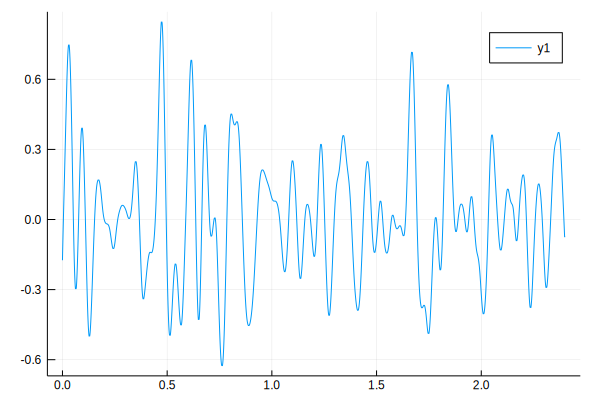

In [2]:
#using Pkg; Pkg.add("Plots")
using Plots
dt = 0.001;
t = range(0,length = length(data), step = dt)

plot(t, data)

In [3]:
using DSP

# get analytical signal
analyticalSignal = hilbert(data);

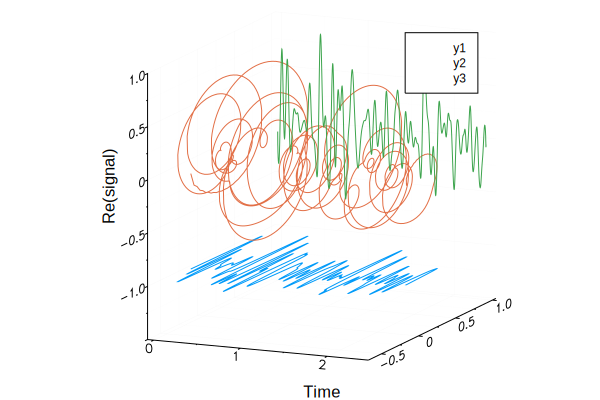

In [4]:
# Plotting is bad here

dt = 0.001;
t = range(0,length = length(analyticalSignal), step = dt);
plot3d(t,[real(analyticalSignal),real(analyticalSignal),ones(length(analyticalSignal))] , [-1*ones(length(analyticalSignal)),imag(analyticalSignal),imag(analyticalSignal)])

xlabel!("Time")
ylabel!("Re(signal)")

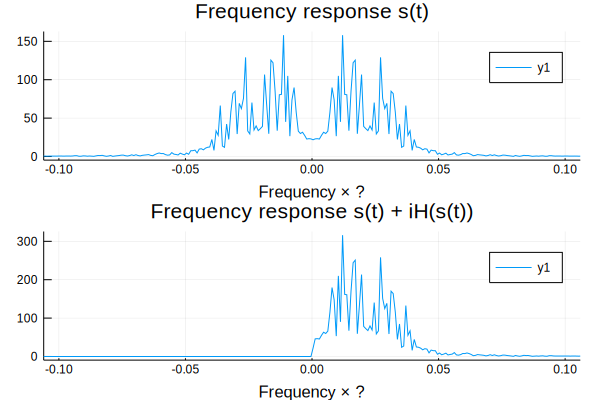

In [5]:
using FFTW
#using DSP
F = fft(analyticalSignal);
F₀ = fft(data);
f = range(-1,1, length=length(F))
p1 = plot(f,abs.(fftshift(F₀)), title="Frequency response s(t)")
p2 = plot(f,abs.(fftshift(F)), title="Frequency response s(t) + iH(s(t))")
plot(p1, p2, xlim=[-0.1,0.1], layout=(2,1))
xlabel!("Frequency × π")

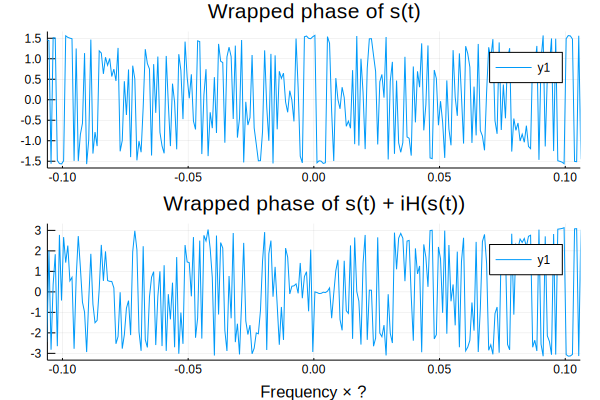

In [6]:
# Phase

p1 = plot(f,fftshift(atan.(real.(F₀) ./ imag.(F₀))), title="Wrapped phase of s(t)")
p2 = plot(f,fftshift(angle.(F)), title="Wrapped phase of s(t) + iH(s(t))")
xlabel!("Frequency × π")

plot(p1, p2, xlim=[-0.1,0.1], layout=(2,1))

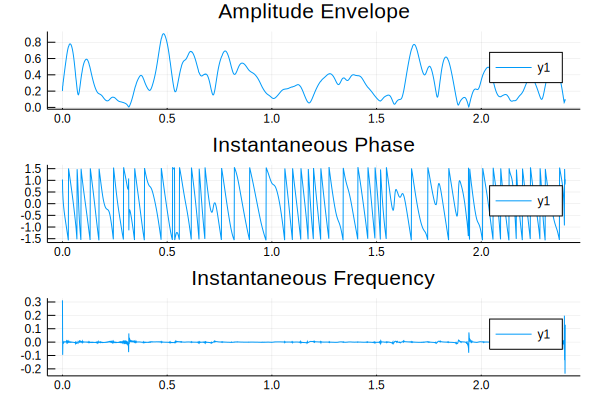

In [7]:
# Amplitude Envelops
envelope = abs.(analyticalSignal);
p1 = plot(t, envelope, title="Amplitude Envelope")

# Phase
phase = atan.(real(analyticalSignal)./imag.(analyticalSignal));
p2 = plot(t, phase, title="Instantaneous Phase")

# Frequency (probably incorrect)
forward = [analyticalSignal[end]; analyticalSignal[1:end-1]];
backward = [analyticalSignal[2:end]; analyticalSignal[end]];
derivative = (forward - 2*analyticalSignal + backward)/2;
freq = (real(analyticalSignal).*imag(derivative) - imag(analyticalSignal).*real(derivative)) ./ (real(analyticalSignal).^2 + imag(analyticalSignal).^2)
p3 = plot(t, freq, title="Instantaneous Frequency")

plot(p1, p2, p3, layout=(3,1))

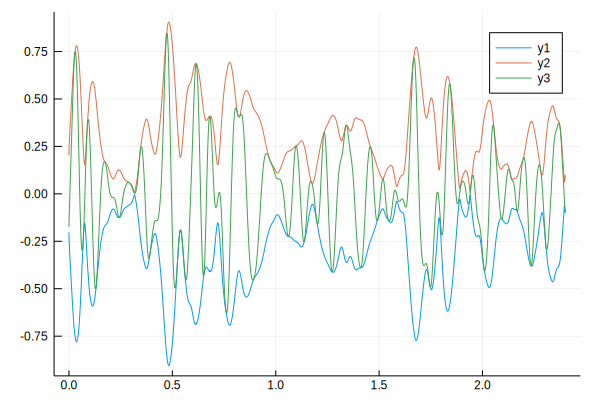

In [8]:
# Plotting envelope

plot(t,[-envelope,envelope, data])